# Decision Tree Classifier, Random Forest Classifier on Game Prediction

#### Dataset from "SteamSpy" based on Steam with estimated number of Owners per game. 
Source: "https://steamspy.com/"

### Import the necessary modules and loaded the data into a Pandas DataFrame named data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# For Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Added onehot and resample for decision tree to try out, imported randomforest
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

ohe = OneHotEncoder()


In [2]:
data = pd.read_csv('GameData_backup_with_review.csv' ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41275 entries, 0 to 41274
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appid                  41275 non-null  int64  
 1   name                   41275 non-null  object 
 2   developer              41275 non-null  object 
 3   publisher              41275 non-null  object 
 4   score_rank             41275 non-null  object 
 5   positive               41275 non-null  int64  
 6   negative               41275 non-null  int64  
 7   userscore              41275 non-null  int64  
 8   owners                 41275 non-null  int64  
 9   average_forever        41275 non-null  int64  
 10  average_2weeks         41275 non-null  int64  
 11  median_forever         41275 non-null  int64  
 12  median_2weeks          41275 non-null  int64  
 13  price                  41275 non-null  float64
 14  initialprice           41275 non-null  float64
 15  di

In [3]:
data.describe()

,appid,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,...,Indie,RPG,Strategy,Sports,Simulation,Racing,Act_Adv,Massively Multiplayer,Free to Play,review
count,4.127500e+04,4.127500e+04,41275.000000,41275.000000,4.127500e+04,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000,...,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000,41275.000000
mean,8.092592e+05,1.363330e+03,231.975385,0.088867,1.731104e+05,175.167971,6.874452,159.140666,7.048819,6.993503,...,0.738776,0.170951,0.193362,0.050709,0.195276,0.036778,0.638764,0.028371,0.077529,68.112199
std,3.595299e+05,3.112102e+04,6042.684927,2.660172,1.588698e+06,2404.544711,107.672110,2552.595744,110.333906,10.470343,...,0.439307,0.376471,0.394939,0.219405,0.396418,0.188218,0.480364,0.166031,0.267432,27.769806
min,3.000000e+02,0.000000e+00,0.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.173850e+05,5.000000e+00,1.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
50%,8.044000e+05,2.100000e+01,7.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,4.900000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,75.000000
75%,1.101090e+06,1.210000e+02,38.000000,0.000000,5.000000e+04,2.000000,0.000000,2.000000,0.000000,9.900000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,89.000000
max,1.769630e+06,5.540107e+06,875035.000000,100.000000,2.000000e+08,245061.000000,8870.000000,245061.000000,8870.000000,999.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


### I split the data into 2 DataFrames named x and y
#### x contains the Predictor Variables and y contains the Response Variables

In [4]:
y = pd.DataFrame(data["owner_cat"])
# x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang',
#                        '18+', 'Indie', 'Free To Play', 'RPG',
#                        'Strategy', 'Sports', 'Simulation', 'Racing',
#                        'Massivley Multiplayer', 'Act_Adv']])
x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang',
                       'english', 'chinese', 'french', 'german', 'italian', 'spanish', 
                       '18+', 'Casual', 'Indie', 'RPG',
                       'Strategy', 'Sports', 'Simulation', 'Racing', 'Act_Adv',
                       'Massively Multiplayer', 'Free to Play', 'review']])

In [5]:
# Further split dataset into train and test dataframes for x and y.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (30956, 1) (30956, 22)
Test Set  : (10319, 1) (10319, 22)


### Create Decision Tree Classifier

#### Set decision tree depth at 10 as depth up to 8 gave an accuracy of roughly 75-78%, but depth = 10 had training accuracy of 80%

In [6]:
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8118943015893526

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7540459346835934



### Plot the Confusion Matrix for Train and Test

#### 

Train data set: 


<AxesSubplot:>

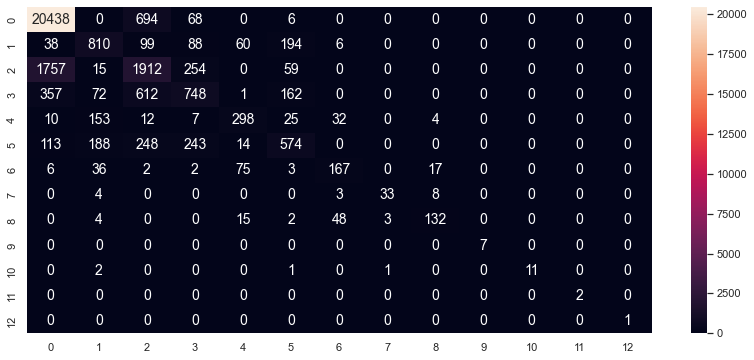

In [7]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

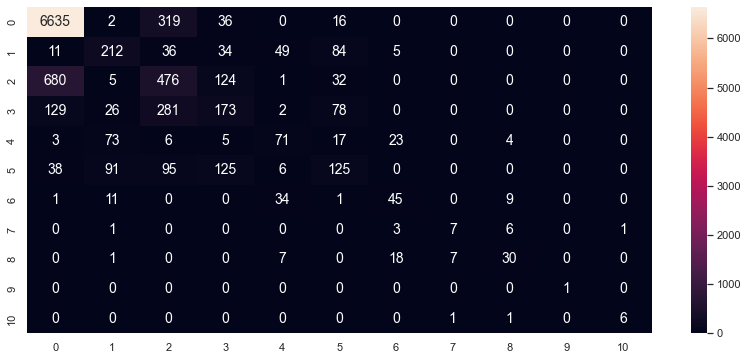

In [8]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

### Plotting Decision Tree - Predicting 12 different classes of different owner sizes, 

[Text(0.4718224687255668, 0.9545454545454546, 'negative <= 28.5\ngini = 0.506\nsamples = 30956\nvalue = [21206, 1295, 3997, 1952, 541, 1380, 308, 48, 204, 7\n15, 2, 1]\nclass = 0'),
 Text(0.22523089327599688, 0.8636363636363636, 'positive <= 46.5\ngini = 0.203\nsamples = 22098\nvalue = [19629, 33, 1942, 386, 7, 96, 5, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.13257427677873337, 0.7727272727272727, 'Free to Play <= 0.5\ngini = 0.14\nsamples = 18843\nvalue = [17440, 29, 1101, 203, 5, 62, 3, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.07940774042220484, 0.6818181818181818, 'negative <= 10.5\ngini = 0.121\nsamples = 17972\nvalue = [16827, 29, 884, 173, 4, 53, 2, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.04266028146989836, 0.5909090909090909, 'positive <= 22.5\ngini = 0.098\nsamples = 15511\nvalue = [14722, 21, 595, 128, 3, 41, 1, 0, 0, 0, 0, 0\n0]\nclass = 0'),
 Text(0.02111024237685692, 0.5, 'initialprice <= 1.75\ngini = 0.089\nsamples = 13702\nvalue = [13071, 20, 473, 104, 2, 31, 1, 0, 0, 0, 0, 

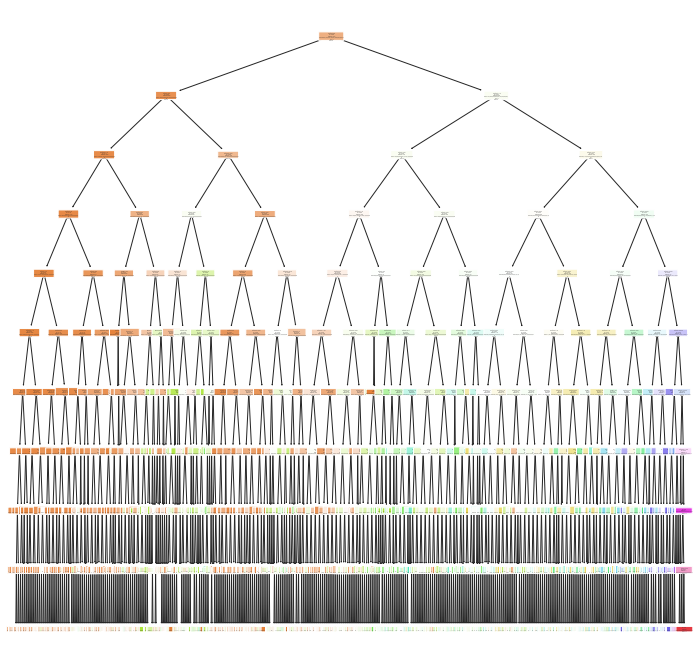

In [9]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])

### Accuracy of Decision Tree Classifier is quite good compared to Machine Learning. However, if we try to resample, it might result in a better accuracy.
#### We decided to try resampling with Decision Tree Classifier

In [10]:
# Created new predictor and response DataFrame named predictors and owner_cat and fitted owner_cat with onehot encoder

owner_cat = pd.DataFrame(data["owner_cat"])

predictors = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang',
                       'english', 'chinese', 'french', 'german', 'italian', 'spanish', 
                       '18+', 'Casual', 'Indie', 'RPG',
                       'Strategy', 'Sports', 'Simulation', 'Racing', 'Act_Adv',
                       'Massively Multiplayer', 'Free to Play', 'review']])
ohe.fit(owner_cat)
owner_cat_ohe = pd.DataFrame(ohe.transform(owner_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(owner_cat.columns))

owner_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41275 entries, 0 to 41274
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_cat_0   41275 non-null  float64
 1   owner_cat_1   41275 non-null  float64
 2   owner_cat_2   41275 non-null  float64
 3   owner_cat_3   41275 non-null  float64
 4   owner_cat_4   41275 non-null  float64
 5   owner_cat_5   41275 non-null  float64
 6   owner_cat_6   41275 non-null  float64
 7   owner_cat_7   41275 non-null  float64
 8   owner_cat_8   41275 non-null  float64
 9   owner_cat_9   41275 non-null  float64
 10  owner_cat_10  41275 non-null  float64
 11  owner_cat_11  41275 non-null  float64
 12  owner_cat_12  41275 non-null  float64
dtypes: float64(13)
memory usage: 4.1 MB


In [11]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41275 entries, 0 to 41274
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               41275 non-null  int64  
 1   negative               41275 non-null  int64  
 2   initialprice           41275 non-null  float64
 3   total_lang             41275 non-null  int64  
 4   english                41275 non-null  int64  
 5   chinese                41275 non-null  int64  
 6   french                 41275 non-null  int64  
 7   german                 41275 non-null  int64  
 8   italian                41275 non-null  int64  
 9   spanish                41275 non-null  int64  
 10  18+                    41275 non-null  int64  
 11  Casual                 41275 non-null  int64  
 12  Indie                  41275 non-null  int64  
 13  RPG                    41275 non-null  int64  
 14  Strategy               41275 non-null  int64  
 15  Sp

In [12]:
# Compiled both predictor and response variable into 1 large dataframe named as data_ohe
data_ohe = pd.concat([predictors, owner_cat_ohe], 
                           sort = False, axis = 1).reindex(index=predictors.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41275 entries, 0 to 41274
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               41275 non-null  int64  
 1   negative               41275 non-null  int64  
 2   initialprice           41275 non-null  float64
 3   total_lang             41275 non-null  int64  
 4   english                41275 non-null  int64  
 5   chinese                41275 non-null  int64  
 6   french                 41275 non-null  int64  
 7   german                 41275 non-null  int64  
 8   italian                41275 non-null  int64  
 9   spanish                41275 non-null  int64  
 10  18+                    41275 non-null  int64  
 11  Casual                 41275 non-null  int64  
 12  Indie                  41275 non-null  int64  
 13  RPG                    41275 non-null  int64  
 14  Strategy               41275 non-null  int64  
 15  Sp

### Split data_ohe into x and y, then into train and test datasets.

In [13]:
y = pd.DataFrame(data_ohe[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12']])
x = pd.DataFrame(data_ohe.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # max_depth = 10
dectree.fit(x_train, y_train)                    # train the decision tree model



DecisionTreeClassifier(max_depth=10)

#### Predict train and test data set with Decision Tree Classifier

In [14]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7528381558909041

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7007187272874101



Train data set: 


<AxesSubplot:>

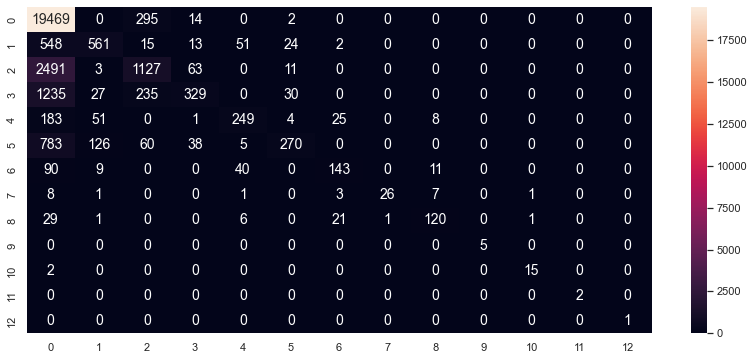

In [15]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1)), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

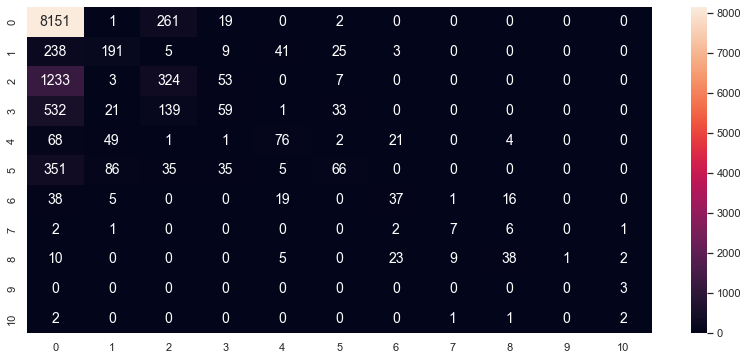

In [16]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1)),  
           annot = True, fmt=".0f", annot_kws={"size": 14})

[Text(0.48165439595872744, 0.9545454545454546, 'negative <= 30.5\ngini = 0.078\nsamples = 28892\nvalue = [[9112, 19780]\n[27678, 1214]\n[25197, 3695]\n[27036, 1856]\n[28371, 521]\n[27610, 1282]\n[28599, 293]\n[28845, 47]\n[28713, 179]\n[28887, 5]\n[28875, 17]\n[28890, 2]\n[28891, 1]]'),
 Text(0.2307340928632846, 0.8636363636363636, 'positive <= 48.5\ngini = 0.032\nsamples = 20887\nvalue = [[2418, 18469]\n[20858, 29]\n[19011, 1876]\n[20468, 419]\n[20878, 9]\n[20806, 81]\n[20883, 4]\n[20887, 0]\n[20887, 0]\n[20887, 0]\n[20887, 0]\n[20887, 0]\n[20887, 0]]'),
 Text(0.13965767411865865, 0.7727272727272727, 'Free to Play <= 0.5\ngini = 0.022\nsamples = 17785\nvalue = [[1332, 16453]\n[17762, 23]\n[16731, 1054]\n[17583, 202]\n[17779, 6]\n[17741, 44]\n[17782, 3]\n[17785, 0]\n[17785, 0]\n[17785, 0]\n[17785, 0]\n[17785, 0]\n[17785, 0]]'),
 Text(0.08950451418744626, 0.6818181818181818, 'negative <= 12.5\ngini = 0.019\nsamples = 16966\nvalue = [[1106, 15860]\n[16944, 22]\n[16093, 873]\n[16801, 165]

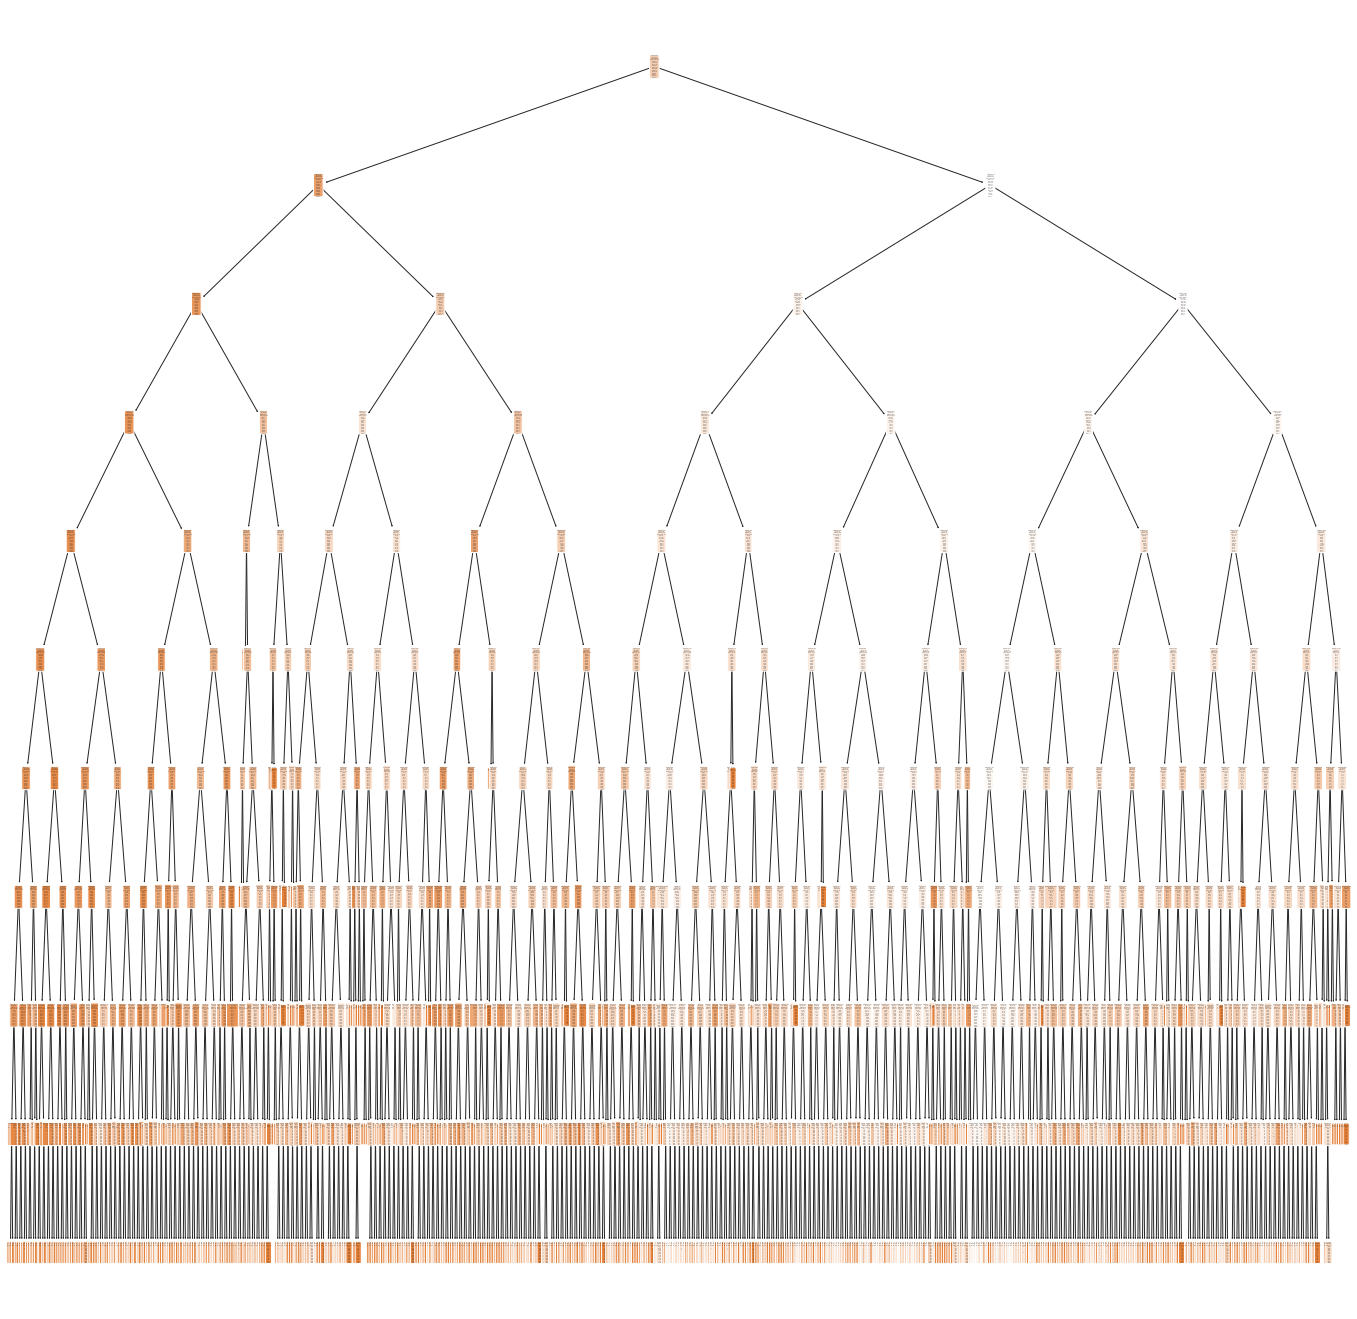

In [17]:
# Plot the trained Decision Tree 
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'])

#### Accuracy was not up to satisfactory level so I am going to attempt resampling the data set for 12 different categories and compile it

In [18]:
# Upsample Bad to match Good

owner_cat_0_bad = data_ohe[data_ohe.owner_cat_0 == 0]
owner_cat_0_good = data_ohe[data_ohe.owner_cat_0 == 1]

# Upsample the Bad samples
owner_cat_0_bad_up = resample(owner_cat_0_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_0_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_0 = pd.concat([owner_cat_0_good, owner_cat_0_bad_up])
 
# Check the ratio of the classes
data_ohe_up_0['owner_cat_0'].value_counts()


owner_cat_1_bad = data_ohe[data_ohe.owner_cat_1 == 0]
owner_cat_1_good = data_ohe[data_ohe.owner_cat_1 == 1]

owner_cat_1_bad_up = resample(owner_cat_1_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_1_good.shape[0])    # to match number of Good
 
data_ohe_up_1 = pd.concat([owner_cat_1_good, owner_cat_1_bad_up])
 
data_ohe_up_1['owner_cat_1'].value_counts()



owner_cat_2_bad = data_ohe[data_ohe.owner_cat_2 == 0]
owner_cat_2_good = data_ohe[data_ohe.owner_cat_2 == 1]
 
owner_cat_2_bad_up = resample(owner_cat_2_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_2_good.shape[0])    # to match number of Good
 
data_ohe_up_2 = pd.concat([owner_cat_2_good, owner_cat_2_bad_up])
 
data_ohe_up_2['owner_cat_2'].value_counts()


owner_cat_3_bad = data_ohe[data_ohe.owner_cat_3 == 0]
owner_cat_3_good = data_ohe[data_ohe.owner_cat_3 == 1]
 
owner_cat_3_bad_up = resample(owner_cat_3_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_3_good.shape[0])    # to match number of Good
 
data_ohe_up_3 = pd.concat([owner_cat_3_good, owner_cat_3_bad_up])
 
data_ohe_up_3['owner_cat_3'].value_counts()


owner_cat_4_bad = data_ohe[data_ohe.owner_cat_4 == 0]
owner_cat_4_good = data_ohe[data_ohe.owner_cat_4 == 1]
 
owner_cat_4_bad_up = resample(owner_cat_4_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_4_good.shape[0])    # to match number of Good
 
data_ohe_up_4 = pd.concat([owner_cat_4_good, owner_cat_4_bad_up])
 
data_ohe_up_4['owner_cat_4'].value_counts()


owner_cat_5_bad = data_ohe[data_ohe.owner_cat_5 == 0]
owner_cat_5_good = data_ohe[data_ohe.owner_cat_5 == 1]
 
owner_cat_5_bad_up = resample(owner_cat_5_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_5_good.shape[0])    # to match number of Good
 
data_ohe_up_5 = pd.concat([owner_cat_5_good, owner_cat_5_bad_up])
 
data_ohe_up_5['owner_cat_5'].value_counts()


owner_cat_6_bad = data_ohe[data_ohe.owner_cat_6 == 0]
owner_cat_6_good = data_ohe[data_ohe.owner_cat_6 == 1]
 
owner_cat_6_bad_up = resample(owner_cat_6_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_6_good.shape[0])    # to match number of Good
 
data_ohe_up_6 = pd.concat([owner_cat_6_good, owner_cat_6_bad_up])
 
data_ohe_up_6['owner_cat_6'].value_counts()


owner_cat_7_bad = data_ohe[data_ohe.owner_cat_7 == 0]
owner_cat_7_good = data_ohe[data_ohe.owner_cat_7 == 1]
 
owner_cat_7_bad_up = resample(owner_cat_7_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_7_good.shape[0])    # to match number of Good
 
data_ohe_up_7 = pd.concat([owner_cat_7_good, owner_cat_7_bad_up])
 
data_ohe_up_7['owner_cat_7'].value_counts()


owner_cat_8_bad = data_ohe[data_ohe.owner_cat_8 == 0]
owner_cat_8_good = data_ohe[data_ohe.owner_cat_8 == 1]
 
owner_cat_8_bad_up = resample(owner_cat_8_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_8_good.shape[0])    # to match number of Good
 
data_ohe_up_8 = pd.concat([owner_cat_8_good, owner_cat_8_bad_up])
 
data_ohe_up_8['owner_cat_8'].value_counts()


owner_cat_9_bad = data_ohe[data_ohe.owner_cat_9 == 0]
owner_cat_9_good = data_ohe[data_ohe.owner_cat_9 == 1]
 
owner_cat_9_bad_up = resample(owner_cat_9_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_9_good.shape[0])    # to match number of Good
 
data_ohe_up_9 = pd.concat([owner_cat_9_good, owner_cat_9_bad_up])
 
data_ohe_up_9['owner_cat_9'].value_counts()


owner_cat_10_bad = data_ohe[data_ohe.owner_cat_10 == 0]
owner_cat_10_good = data_ohe[data_ohe.owner_cat_10 == 1]
 
owner_cat_10_bad_up = resample(owner_cat_10_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_10_good.shape[0])    # to match number of Good
 
data_ohe_up_10 = pd.concat([owner_cat_10_good, owner_cat_10_bad_up])
 
data_ohe_up_10['owner_cat_10'].value_counts()


owner_cat_11_bad = data_ohe[data_ohe.owner_cat_11 == 0]
owner_cat_11_good = data_ohe[data_ohe.owner_cat_11 == 1]
 
owner_cat_11_bad_up = resample(owner_cat_11_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_11_good.shape[0])    # to match number of Good
 
data_ohe_up_11 = pd.concat([owner_cat_11_good, owner_cat_11_bad_up])
 
data_ohe_up_11['owner_cat_11'].value_counts()


owner_cat_12_bad = data_ohe[data_ohe.owner_cat_12 == 0]
owner_cat_12_good = data_ohe[data_ohe.owner_cat_12 == 1]
 
owner_cat_12_bad_up = resample(owner_cat_12_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_12_good.shape[0])    # to match number of Good
 
data_ohe_up_12 = pd.concat([owner_cat_12_good, owner_cat_12_bad_up])
 
data_ohe_up_12['owner_cat_12'].value_counts()


# Compile all dataframe into 1 big dataframe again!
data_ohe_up = pd.concat([data_ohe_up_0, data_ohe_up_1, data_ohe_up_2, 
                         data_ohe_up_3, data_ohe_up_4, data_ohe_up_5, data_ohe_up_6,
                         data_ohe_up_7, data_ohe_up_8, data_ohe_up_9, data_ohe_up_10, data_ohe_up_11, data_ohe_up_12])
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82550 entries, 32 to 40271
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               82550 non-null  int64  
 1   negative               82550 non-null  int64  
 2   initialprice           82550 non-null  float64
 3   total_lang             82550 non-null  int64  
 4   english                82550 non-null  int64  
 5   chinese                82550 non-null  int64  
 6   french                 82550 non-null  int64  
 7   german                 82550 non-null  int64  
 8   italian                82550 non-null  int64  
 9   spanish                82550 non-null  int64  
 10  18+                    82550 non-null  int64  
 11  Casual                 82550 non-null  int64  
 12  Indie                  82550 non-null  int64  
 13  RPG                    82550 non-null  int64  
 14  Strategy               82550 non-null  int64  
 15  S

In [19]:
# split data into x and y for predictor and response variable, and separate further into train and test data set

y = pd.DataFrame(data_ohe_up[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12']])
x = pd.DataFrame(data_ohe_up.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model



DecisionTreeClassifier(max_depth=10)

#### Even when onehot encoded and resampled, model is not very good :(

In [20]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6220818551527213

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6022612558045629



Train data set: 


<AxesSubplot:>

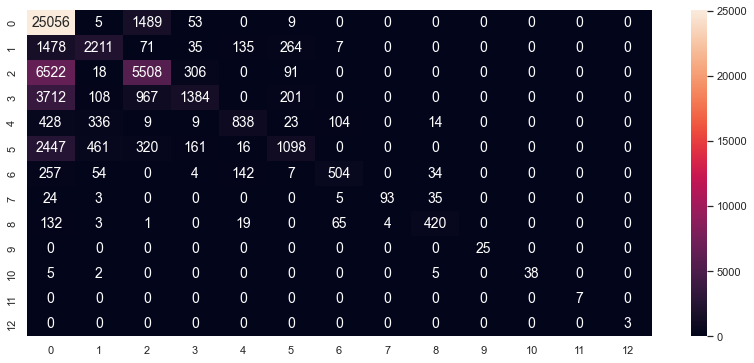

In [21]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1)), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

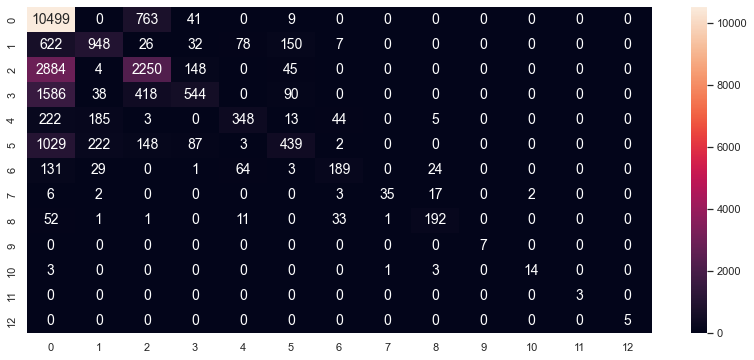

In [22]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1)),  
           annot = True, fmt=".0f", annot_kws={"size": 14})

[Text(0.4736685214626391, 0.9545454545454546, 'negative <= 18.5\ngini = 0.11\nsamples = 57785\nvalue = [[31173, 26612]\n[53584, 4201]\n[45340, 12445]\n[51413, 6372]\n[56024, 1761]\n[53282, 4503]\n[56783, 1002]\n[57625, 160]\n[57141, 644]\n[57760, 25]\n[57735, 50]\n[57778, 7]\n[57782, 3]]'),
 Text(0.22358157790143085, 0.8636363636363636, 'positive <= 37.5\ngini = 0.051\nsamples = 28749\nvalue = [[5649, 23100]\n[28666, 83]\n[24210, 4539]\n[27973, 776]\n[28733, 16]\n[28523, 226]\n[28740, 9]\n[28749, 0]\n[28749, 0]\n[28749, 0]\n[28749, 0]\n[28749, 0]\n[28749, 0]]'),
 Text(0.13373161764705882, 0.7727272727272727, 'Free to Play <= 0.5\ngini = 0.04\nsamples = 23942\nvalue = [[3520, 20422]\n[23870, 72]\n[21171, 2771]\n[23445, 497]\n[23930, 12]\n[23779, 163]\n[23937, 5]\n[23942, 0]\n[23942, 0]\n[23942, 0]\n[23942, 0]\n[23942, 0]\n[23942, 0]]'),
 Text(0.08865759141494435, 0.6818181818181818, 'negative <= 9.5\ngini = 0.036\nsamples = 22679\nvalue = [[2939, 19740]\n[22614, 65]\n[20383, 2296]\n[222

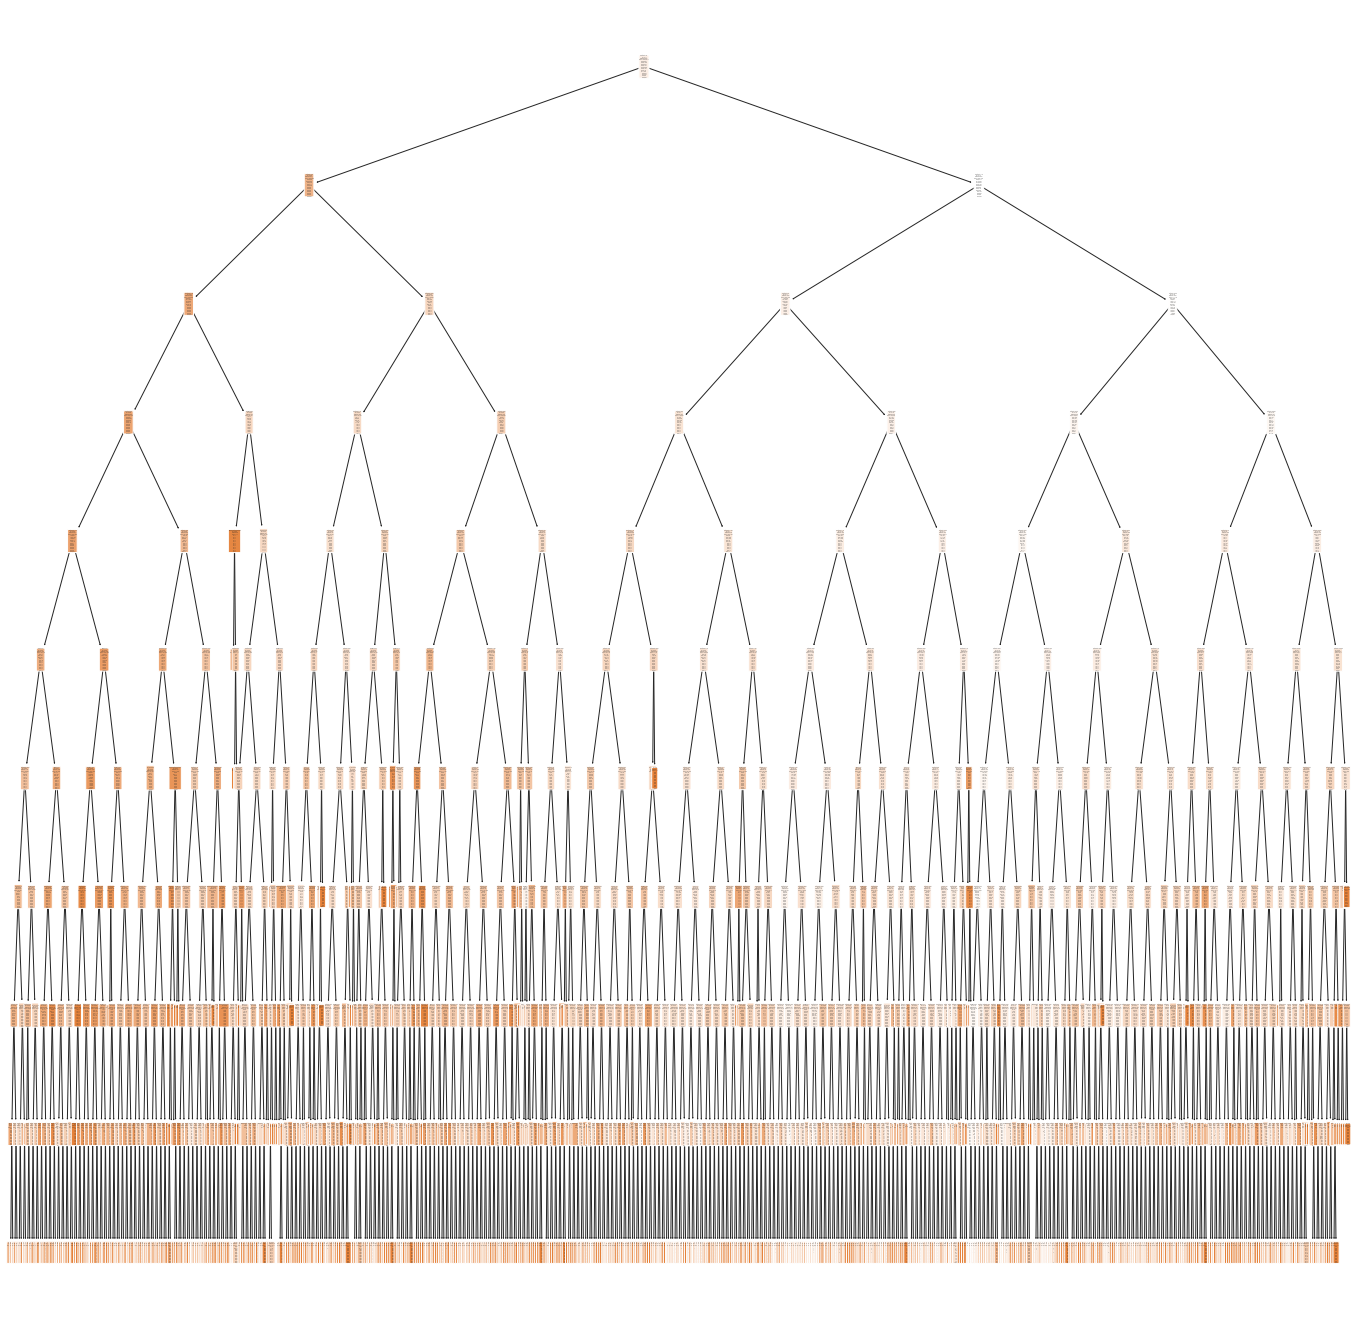

In [23]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'])

### Random Forest Classifer Attempt (not onehot encoded)

#### Estimators = 1000, max_depth = 10

In [24]:
owner_cat = pd.DataFrame(data["owner_cat"])
# predictors = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
#                              'total_lang', '18+', 'Indie', 'Free To Play', 
#                              'RPG', 'Strategy', 'Sports', 'Simulation', 
#                              'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])
x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang',
                       'english', 'chinese', 'french', 'german', 'italian', 'spanish', 
                       '18+', 'Casual', 'Indie', 'RPG',
                       'Strategy', 'Sports', 'Simulation', 'Racing', 'Act_Adv',
                       'Massively Multiplayer', 'Free to Play', 'review']])

In [25]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictors, owner_cat, test_size = 0.3)

rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.argmax(axis=1))

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [26]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)
y_test_pred = rforest.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Random Forest Accuracy 	: 0.6839609580506715

Goodness of Fit of Model 	Test Dataset
Random Forest Accuracy 	: 0.6826294112896714



Train data set: 


<AxesSubplot:>

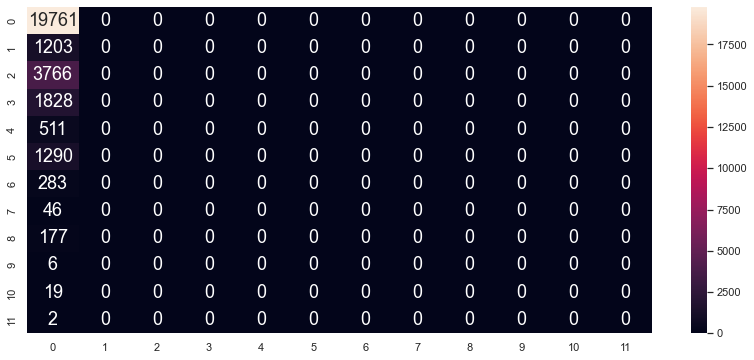

In [27]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data set: 


<AxesSubplot:>

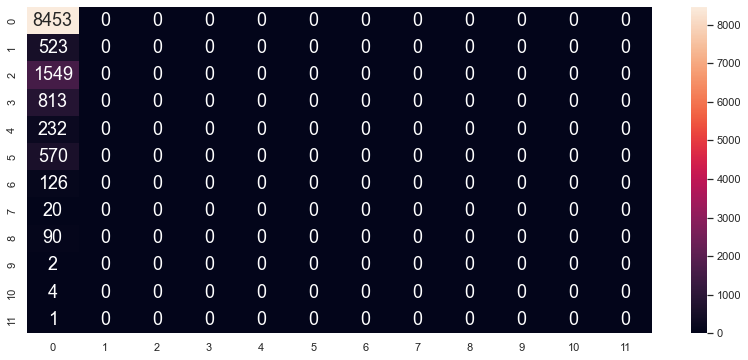

In [28]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Random Forest Classifer Attempt (onehot encoded)

#### Estimators = 1000, max_depth = 10

In [29]:
# Import essential models and functions from sklearn

# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12']])
x = pd.DataFrame(data_ohe_up.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.argmax(axis=1))

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [30]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)
y_test_pred = rforest.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_train, y_train.values.argmax(axis=1)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_test, y_test.values.argmax(axis=1)))
print()

Goodness of Fit of Model 	Train Dataset
Random Forest Accuracy 	: 0.7361079865016873

Goodness of Fit of Model 	Test Dataset
Random Forest Accuracy 	: 0.713345447203715



Train data set: 


<AxesSubplot:>

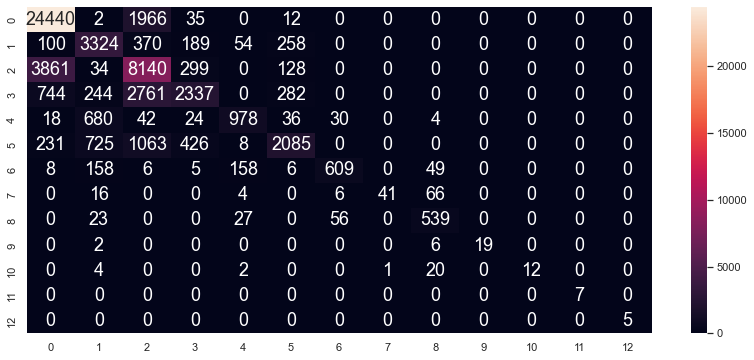

In [31]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data set: 


<AxesSubplot:>

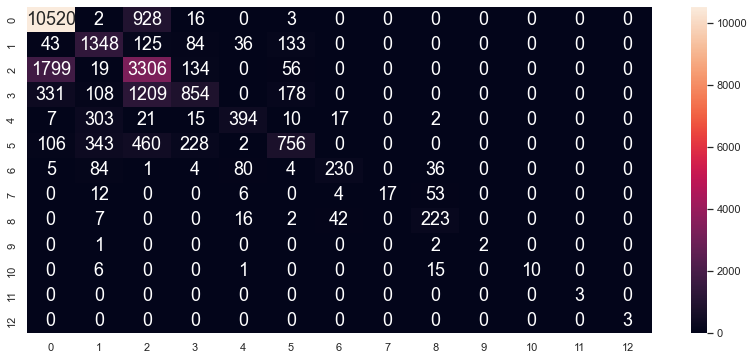

In [32]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

------

------

### After running the algorithms above, Decision Tree seems to be the best choice for predicting sale of games. 
### However, there are a lot of columns used as predictor. Can we split the predictors up to see which one affect sales the most?

#### I have decided to split the predictors into 3 groups, 
##### Group 1: Positive & Negative Reviews, initial privce, average playing time of game, and total number of languages available
##### Group 2: All the different genres
##### Group 3: Different languages 

### Group 1:

<AxesSubplot:>

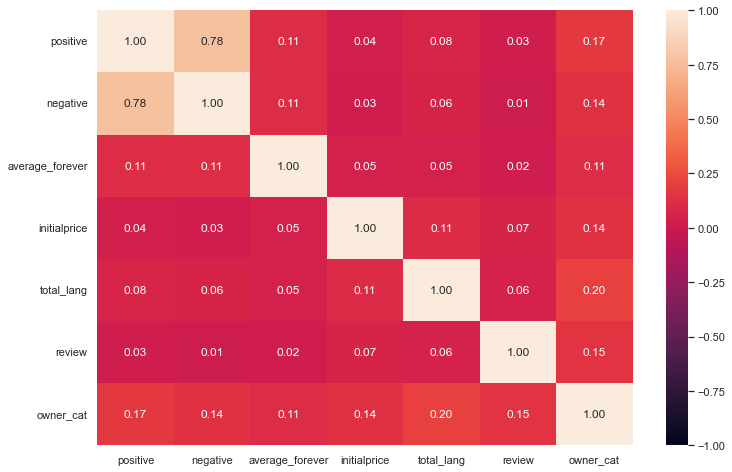

In [33]:
minidata = data[['positive', 'negative', 'average_forever', 'initialprice', 'total_lang', 'review', 'owner_cat']]
minidata.corr()

f = plt.figure(figsize=(12, 8))
sb.heatmap(minidata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [34]:
y1 = pd.DataFrame(data["owner_cat"])
x1 = pd.DataFrame(data[['positive', 'negative', 'average_forever', 'initialprice', 'total_lang']])

# Further split dataset into train and test dataframes for x and y.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)
print("Train Set :", y_train1.shape, x_train1.shape)
print("Test Set  :", y_test1.shape, x_test1.shape)

dectree1 = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree1.fit(x_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree1.predict(x_train1)
y_test_pred1 = dectree1.predict(x_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset Group 1")
print("Classification Accuracy \t:", dectree1.score(x_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset Group 1")
print("Classification Accuracy \t:", dectree1.score(x_test1, y_test1))
print()

Train Set : (28892, 1) (28892, 5)
Test Set  : (12383, 1) (12383, 5)
Goodness of Fit of Model 	Train Dataset Group 1
Classification Accuracy 	: 0.8130970510868061

Goodness of Fit of Model 	Test Dataset Group 1
Classification Accuracy 	: 0.7591052249051119



Train data set: 


<AxesSubplot:>

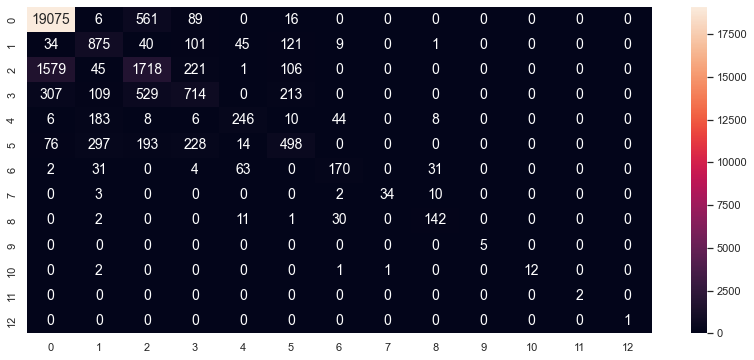

In [35]:
# f, axes = plt.subplots(2, 1, figsize=(14, 12))
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

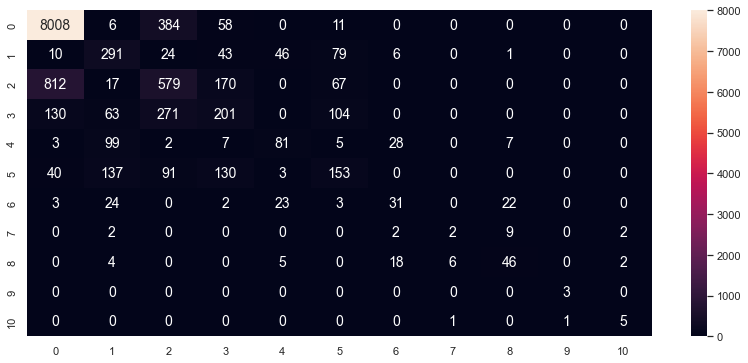

In [36]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

### Group 2: 

<AxesSubplot:>

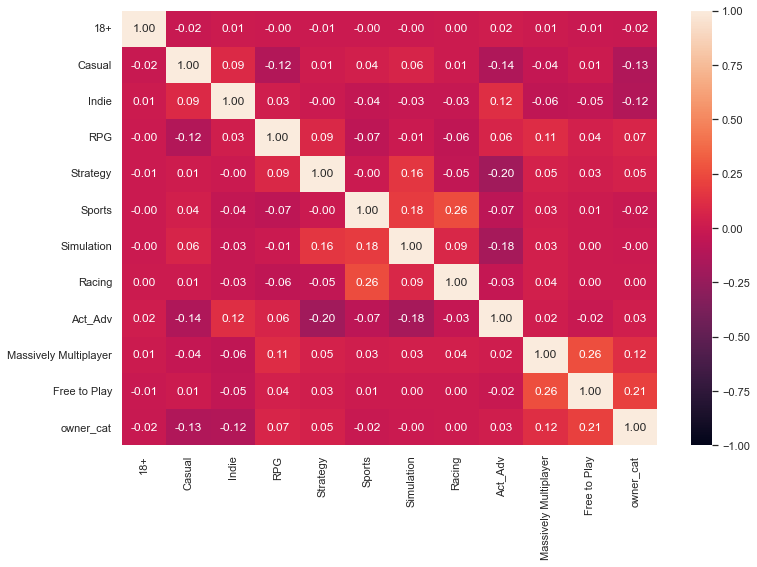

In [37]:
minidata = data[['18+', 'Casual', 'Indie', 'RPG',
                 'Strategy', 'Sports', 'Simulation', 'Racing', 'Act_Adv',
                 'Massively Multiplayer', 'Free to Play', 'owner_cat']]
minidata.corr()

f = plt.figure(figsize=(12, 8))
sb.heatmap(minidata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [38]:
y2 = pd.DataFrame(data["owner_cat"])
x2 = pd.DataFrame(data[['18+', 'Casual', 'Indie', 'RPG',
                       'Strategy', 'Sports', 'Simulation', 'Racing', 'Act_Adv',
                       'Massively Multiplayer', 'Free to Play']])

# Further split dataset into train and test dataframes for x and y.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3)
print("Train Set :", y_train2.shape, x_train2.shape)
print("Test Set  :", y_test2.shape, x_test2.shape)

dectree2 = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree2.fit(x_train2, y_train2)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred2 = dectree2.predict(x_train2)
y_test_pred2 = dectree2.predict(x_test2)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset Group 2")
print("Classification Accuracy \t:", dectree2.score(x_train2, y_train2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset Group 2")
print("Classification Accuracy \t:", dectree2.score(x_test2, y_test2))
print()

Train Set : (28892, 1) (28892, 11)
Test Set  : (12383, 1) (12383, 11)
Goodness of Fit of Model 	Train Dataset Group 2
Classification Accuracy 	: 0.6911255710923438

Goodness of Fit of Model 	Test Dataset Group 2
Classification Accuracy 	: 0.6802067350399742



Train data set: 


<AxesSubplot:>

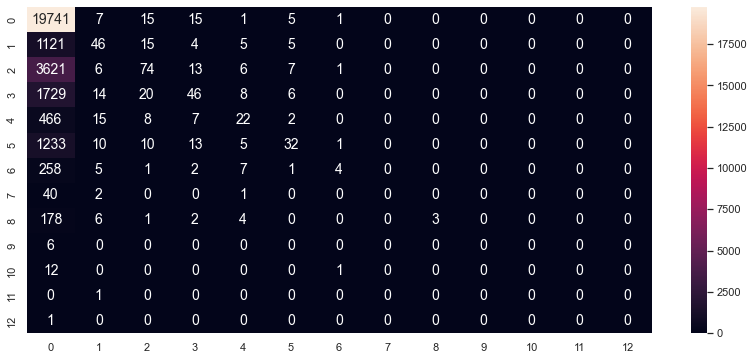

In [39]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train2, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

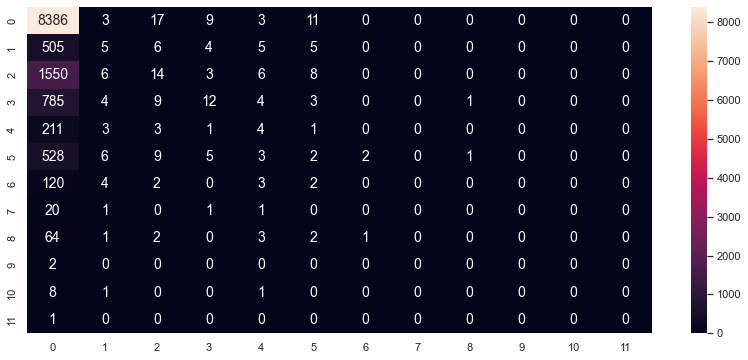

In [40]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test2, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

### Group 3

<AxesSubplot:>

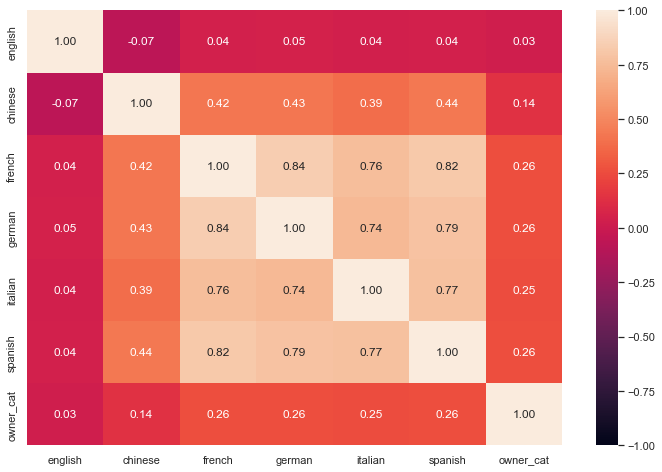

In [41]:
minidata = data[['english', 'chinese', 'french', 'german', 'italian', 'spanish', 'owner_cat']]
minidata.corr()

f = plt.figure(figsize=(12, 8))
sb.heatmap(minidata.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [42]:
y3 = pd.DataFrame(data["owner_cat"])
x3 = pd.DataFrame(data[['english', 'chinese', 'french', 'german', 'italian', 'spanish']])

# Further split dataset into train and test dataframes for x and y.
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.3)
print("Train Set :", y_train3.shape, x_train3.shape)
print("Test Set  :", y_test3.shape, x_test3.shape)

dectree3 = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree3.fit(x_train3, y_train3)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred3 = dectree3.predict(x_train3)
y_test_pred3 = dectree3.predict(x_test3)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(x_train3, y_train3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(x_test3, y_test3))
print()

Train Set : (28892, 1) (28892, 6)
Test Set  : (12383, 1) (12383, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6856915409109788

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.678591617540176



Train data set: 


<AxesSubplot:>

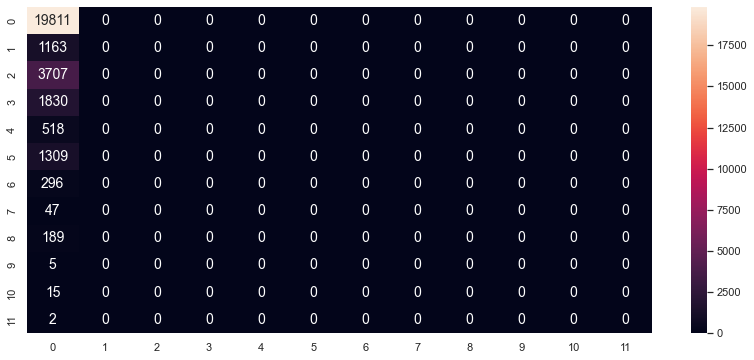

In [43]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train3, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

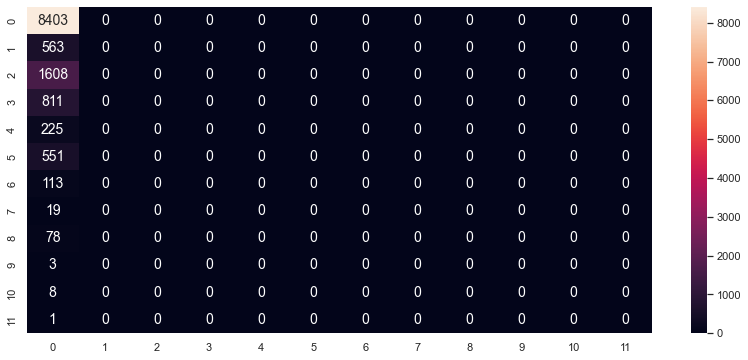

In [44]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test3, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

In [45]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset Group 1")
print("Classification Accuracy \t:", dectree1.score(x_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset Group 1")
print("Classification Accuracy \t:", dectree1.score(x_test1, y_test1))
print()
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset Group 2")
print("Classification Accuracy \t:", dectree2.score(x_train2, y_train2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset Group 2")
print("Classification Accuracy \t:", dectree2.score(x_test2, y_test2))
print()
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(x_train3, y_train3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(x_test3, y_test3))
print()

Goodness of Fit of Model 	Train Dataset Group 1
Classification Accuracy 	: 0.8130970510868061

Goodness of Fit of Model 	Test Dataset Group 1
Classification Accuracy 	: 0.7591052249051119


Goodness of Fit of Model 	Train Dataset Group 2
Classification Accuracy 	: 0.6911255710923438

Goodness of Fit of Model 	Test Dataset Group 2
Classification Accuracy 	: 0.6802067350399742


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6856915409109788

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.678591617540176



#### From this, even though the correlation of languages to the number of owners in group 3 is the highest, the prediction with decision tree is not as accurate. 
### In comparison, the best columns to predict the sale of the games would be group 1 with the positive and negative reviews, yielding an 80% accuracy. 